**Mounting drive in order to use files stored on google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Setting the Path***

In [ ]:
cd /content/drive/MyDrive/FYP/first/final/Results/Plots/Ten_hrsData_prediction

/content/drive/MyDrive/FYP/first/plots/Ten_hrsData_prediction


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
#Function to convert the categorical variables to numerical data for further analysis
from sklearn.preprocessing import LabelEncoder
def Encoder(file_name):
    to_encode = list(file_name.select_dtypes(include = ['category', 'object']))
    
    #created a LabelEncoder object
    enc = LabelEncoder()
    
    for col in to_encode:
        try:
            file_name[col] = enc.fit_transform(file_name[col])
        except:
            print("Error while encoding " + col)
            
    return file_name

In [ ]:
pwd

'/content/drive/MyDrive/FYP/first/plots/Ten_hrsData_prediction'

**Plotting each HRV parameters with the predictions**

Inter Beat Interval (IBI)-data-2023-01-31 09_36_44_patient_parameters_combined_parameters_pred.csv
Inter Beat Interval (IBI)-data-2023-01-31 09_44_41_patient_parameters_combined_parameters_pred.csv
Inter Beat Interval (IBI)-data-2023-01-31 09_42_51_patient_parameters_combined_parameters_pred.csv
Inter Beat Interval (IBI)-data-2023-01-31 09_51_45_patient_parameters_combined_parameters_pred.csv
Inter Beat Interval (IBI)-data-2023-01-31 09_48_46_patient_parameters_combined_parameters_pred.csv


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

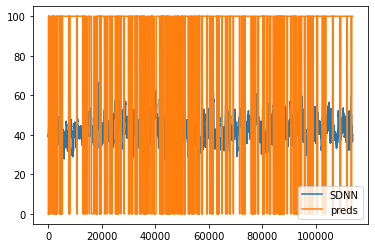

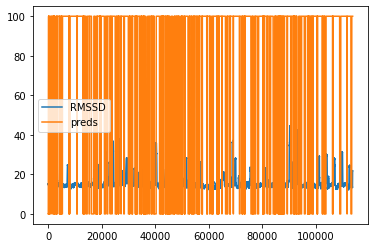

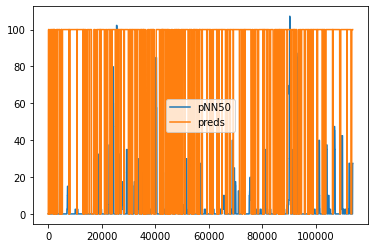

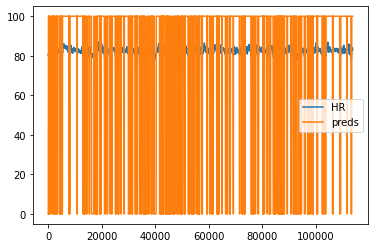

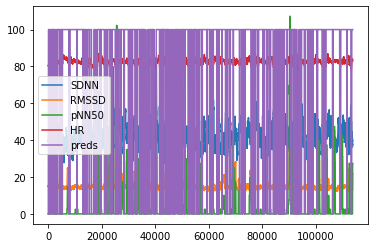

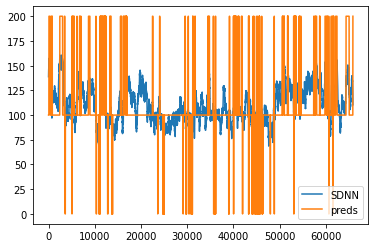

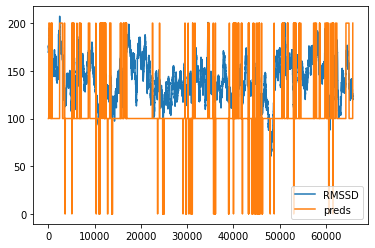

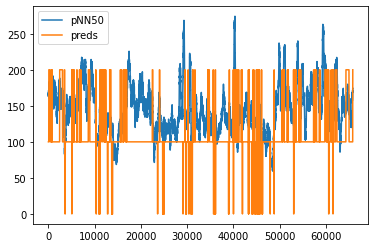

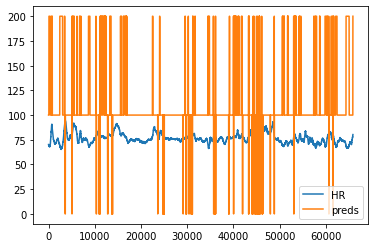

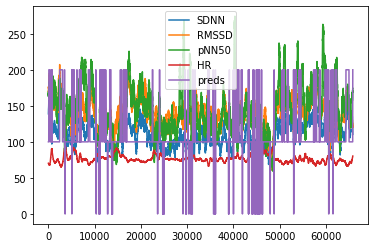

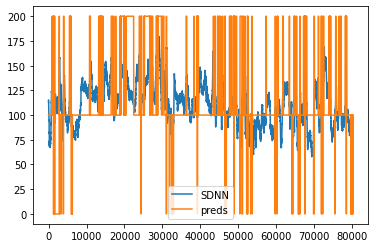

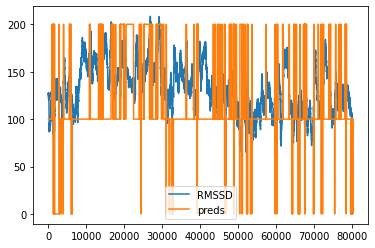

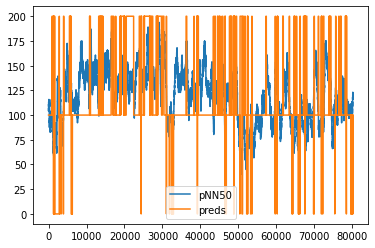

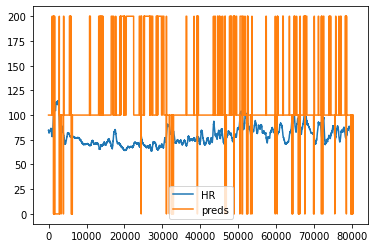

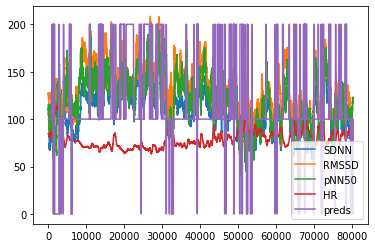

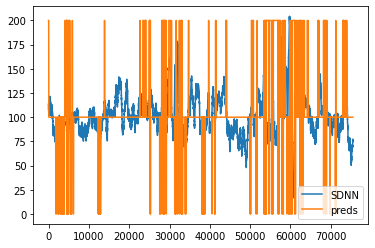

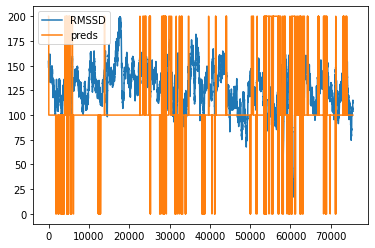

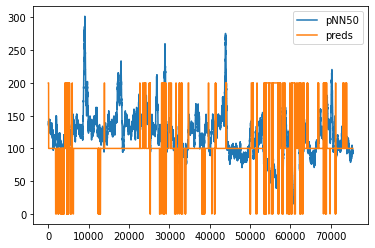

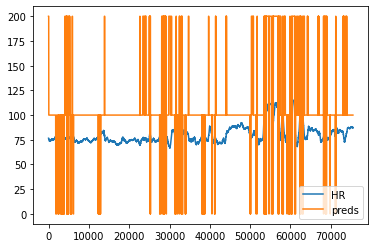

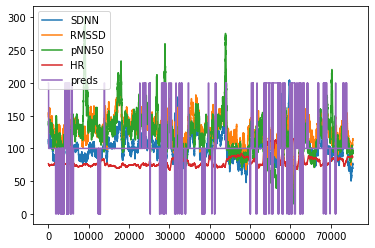

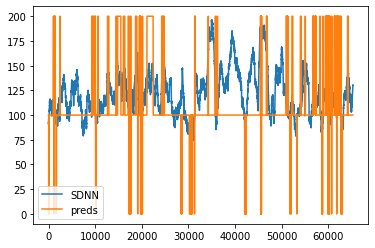

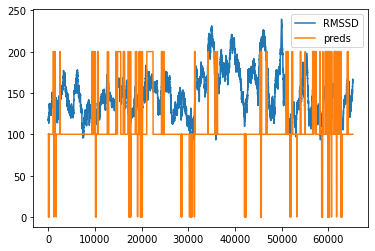

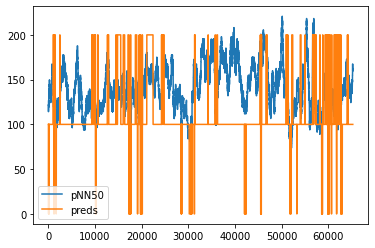

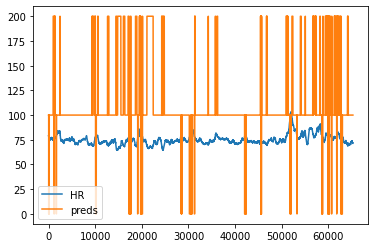

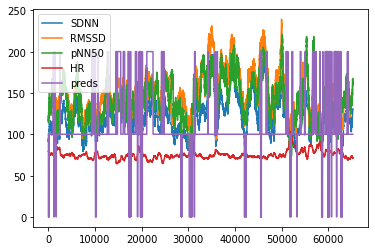

In [ ]:
files = os.listdir("/content/drive/MyDrive/FYP/first/final/Results/Predictions_Stress_Analysis/Ten_hrsData_prediction")
for f in files:
  print(f)
  data = pd.read_csv("/content/drive/MyDrive/FYP/first/final/Results/Predictions_Stress_Analysis/Ten_hrsData_prediction/"+f, index_col=0)
  data_new = data
  data_new = Encoder(data_new)
  data_new.rename(columns = {'Stress_Levels':'preds','SDRR':'SDNN'}, inplace=True)

  os.mkdir("/content/drive/MyDrive/FYP/first/plots/Ten_hrsData_prediction/"+f)
  data_new["pNN50"] = 1000*data_new["pNN50"] # scaling up to make visible in the graph
  data_new["preds"] = 100*data_new["preds"] # scaling up to make visible in the graph

  fig1 = data_new[["SDNN","preds"]].plot().get_figure()
  fig1.savefig("/content/drive/MyDrive/FYP/first/plots/Ten_hrsData_prediction/"+f+"/sdnn.jpg")
  fig2 = data_new[["RMSSD","preds"]].plot().get_figure()
  fig2.savefig("/content/drive/MyDrive/FYP/first/plots/Ten_hrsData_prediction/"+f+"/rmssd.jpg")
  fig3 = data_new[["pNN50","preds"]].plot().get_figure()
  fig3.savefig("/content/drive/MyDrive/FYP/first/plots/Ten_hrsData_prediction/"+f+"/pnn50.jpg")
  fig4 = data_new[["HR","preds"]].plot().get_figure()
  fig4.savefig("/content/drive/MyDrive/FYP/first/plots/Ten_hrsData_prediction/"+f+"/hr.jpg")
  fig5 = data_new[["SDNN","RMSSD","pNN50","HR","preds"]].plot().get_figure()
  fig5.savefig("/content/drive/MyDrive/FYP/first/plots/Ten_hrsData_prediction/"+f+"/whole.jpg")
  

**Visualising the Predictions with pie charts**

In [ ]:
#Pie Chart for stress analysis
from google.colab import output
from matplotlib import pyplot as plt
files = os.listdir("/content/drive/MyDrive/FYP/first/final/Results/Predictions_Stress_Analysis/Ten_hrsData_prediction")
for f in files:
  #print(f)
  df = pd.read_csv("/content/drive/MyDrive/FYP/first/final/Results/Predictions_Stress_Analysis/Ten_hrsData_prediction/"+f, index_col=0)
  colors = ['pink', 'silver', 'steelblue']
  # Define the ratio of gap of each fragment in a tuple
  #explode = (0.05, 0.05, 0.05)
  fig6=df.groupby('Stress_Levels').size().plot(kind='pie', textprops={'fontsize': 10}, y='Stress_Levels',colors=colors).get_figure()
  fig6.savefig("/content/drive/MyDrive/FYP/first/plots/Ten_hrsData_prediction/"+f+"/stress_pie.jpg")
  #fig6 = None
  #df= None
  #kind= None
  #output.clear()
  plt.clf()


FileNotFoundError: ignored